# "Stellar Classification"
> "Using XGBoost Classifier to predict the class of Interstellar Objects to 98% Accuracy"
- toc: false
- branch: master
- badges: false
- comments: false
- image: images/Class Report.png
- hide: false
- search_exclude: true


In [46]:
import numpy as np 
import pandas as pd 
import bokeh
from pycaret.classification import *
from autoviz.AutoViz_Class import AutoViz_Class
import matplotlib.pyplot as plt
%matplotlib inline
import klib
import sweetviz
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
stellar = pd.read_csv("star_classification.csv")
stellar.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

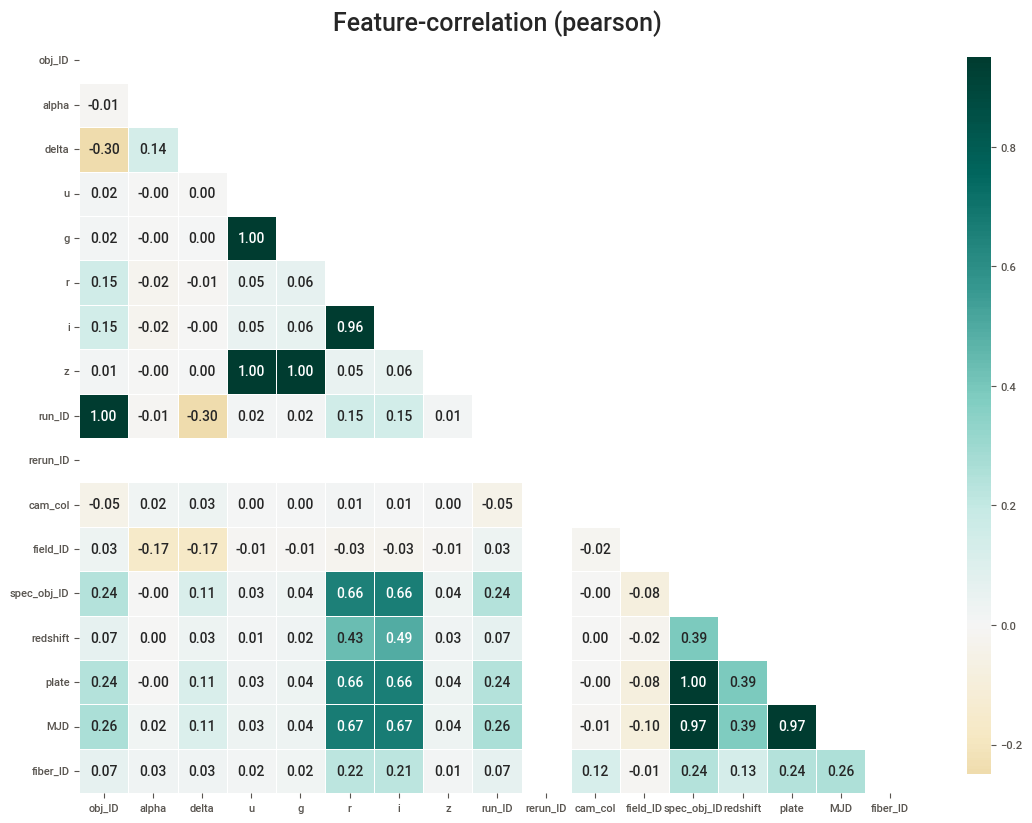

In [48]:
klib.corr_plot(stellar)

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


<AxesSubplot:xlabel='fiber_ID', ylabel='Density'>

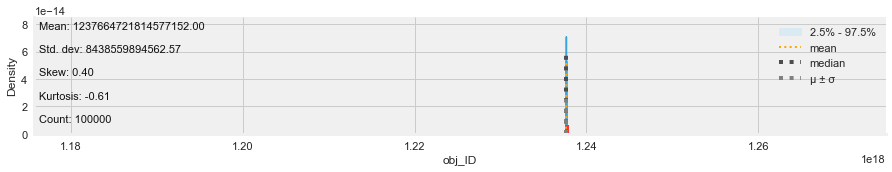

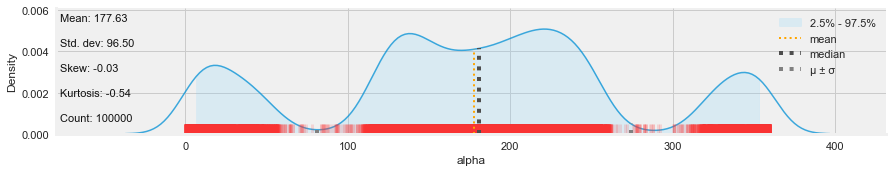

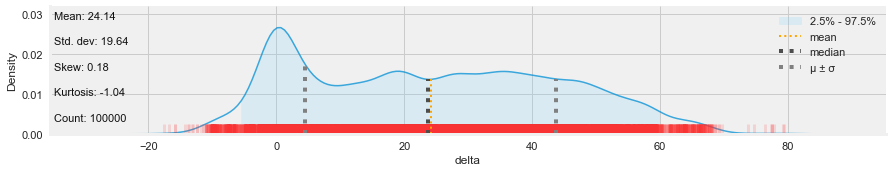

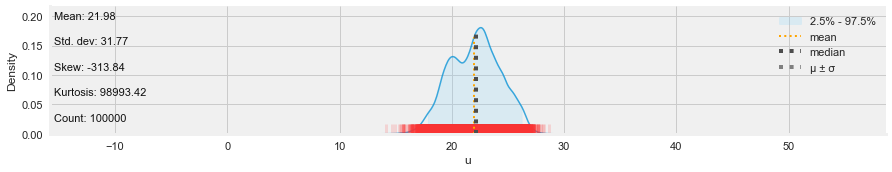

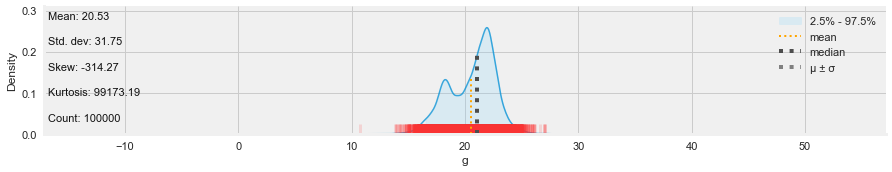

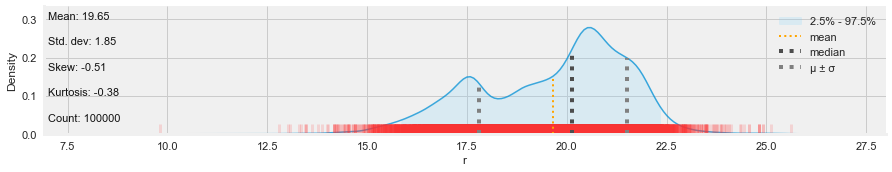

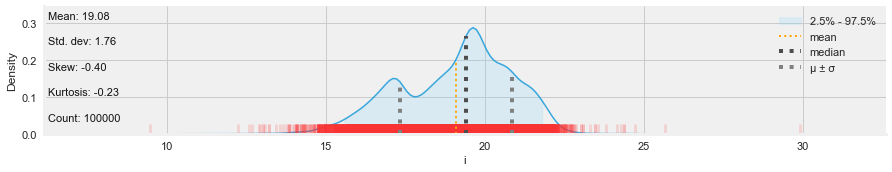

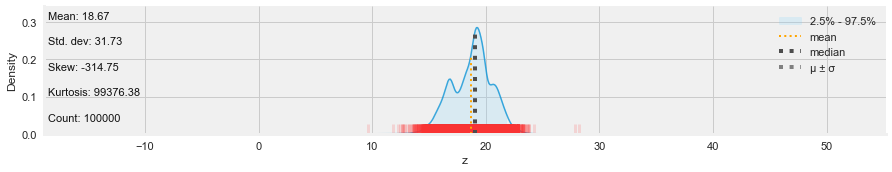

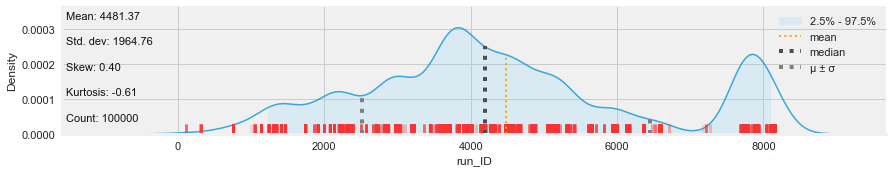

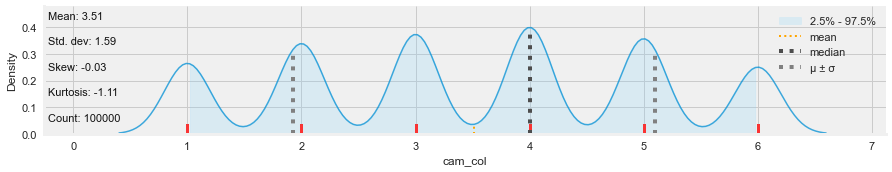

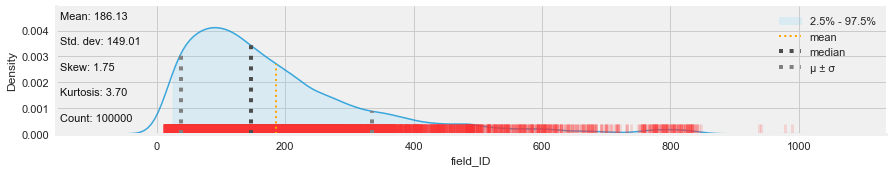

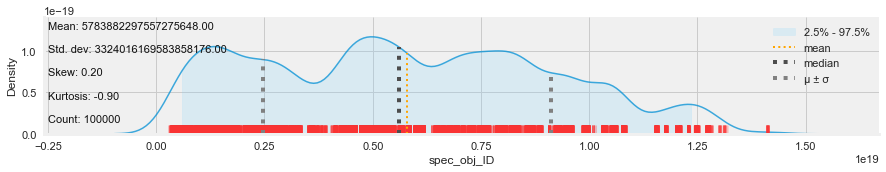

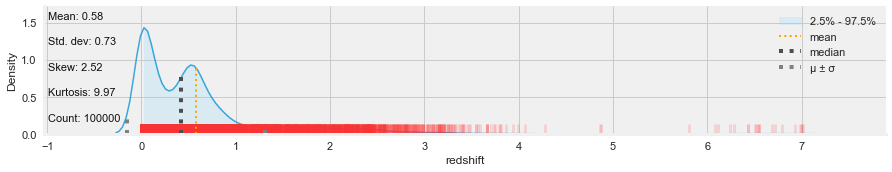

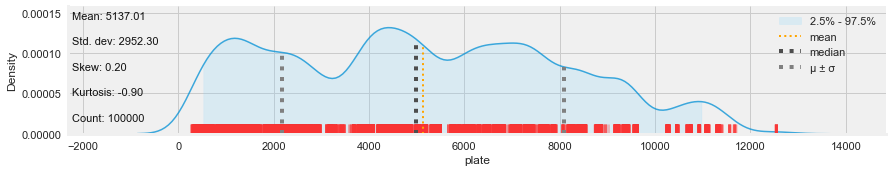

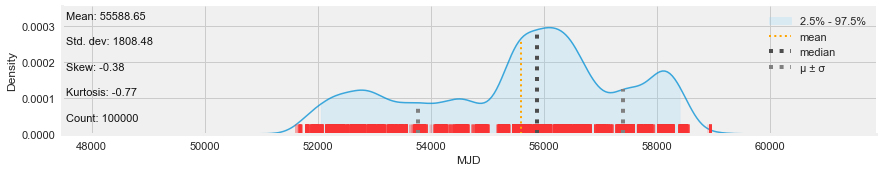

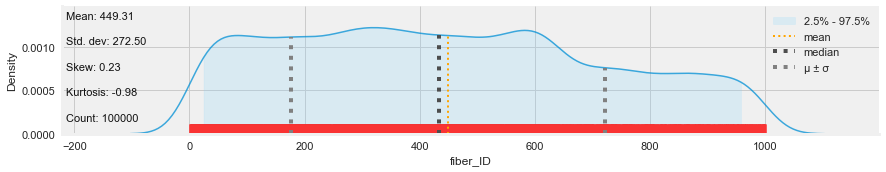

In [45]:
klib.dist_plot(stellar)

In [4]:
from pycaret.classification import *

In [5]:
clf = setup(stellar, target = 'class', normalize = True, remove_outliers=True)

,Description,Value
0,session_id,5349
1,Target,class
2,Target Type,Multiclass
3,Label Encoded,"GALAXY: 0, QSO: 1, STAR: 2"
4,Original Data,"(100000, 18)"
5,Missing Values,0
6,Numeric Features,15
7,Categorical Features,2
8,Ordinal Features,0
9,High Cardinality Features,0


In [6]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9785,0.9954,0.9705,0.9783,0.9783,0.9613,0.9614,13.2020
lightgbm,Light Gradient Boosting Machine,0.9777,0.9953,0.9701,0.9776,0.9776,0.9600,0.9600,2.6480
gbc,Gradient Boosting Classifier,0.9763,0.9948,0.9659,0.9762,0.9761,0.9574,0.9576,18.5630
rf,Random Forest Classifier,0.9762,0.9939,0.9689,0.9760,0.9760,0.9573,0.9573,3.1660
et,Extra Trees Classifier,0.9703,0.9919,0.9618,0.9702,0.9701,0.9467,0.9468,1.2490
dt,Decision Tree Classifier,0.9643,0.9672,0.9583,0.9644,0.9643,0.9362,0.9362,0.3410
lr,Logistic Regression,0.9563,0.9857,0.9451,0.9563,0.9558,0.9217,0.9220,2.3760
svm,SVM - Linear Kernel,0.9077,0.0000,0.8816,0.9093,0.9065,0.8310,0.8333,0.1070
nb,Naive Bayes,0.9069,0.9701,0.9159,0.9168,0.9096,0.8387,0.8416,0.0390
knn,K Neighbors Classifier,0.8862,0.9416,0.8374,0.8899,0.8840,0.7867,0.7925,16.1070


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=-1,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=5349, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=None, subsample=1, tree_method='auto',
              use_label_encoder=True, validate_parameters=1, verbosity=0)

In [9]:
xgboost = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9774,0.9954,0.9686,0.9773,0.9773,0.9595,0.9596
1,0.9762,0.9949,0.9670,0.9761,0.9761,0.9573,0.9574
2,0.9791,0.9962,0.9710,0.9790,0.9790,0.9625,0.9626
3,0.9782,0.9953,0.9712,0.9781,0.9781,0.9609,0.9609
4,0.9814,0.9957,0.9747,0.9813,0.9813,0.9666,0.9666
5,0.9794,0.9956,0.9714,0.9793,0.9793,0.9630,0.9631
6,0.9802,0.9950,0.9709,0.9801,0.9800,0.9643,0.9645
7,0.9764,0.9954,0.9683,0.9762,0.9763,0.9576,0.9577
8,0.9808,0.9966,0.9742,0.9807,0.9807,0.9655,0.9655
9,0.9755,0.9939,0.9675,0.9753,0.9753,0.9560,0.9561


/Users/shaunroecker/opt/anaconda3/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/shaunroecker/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/shaunroecker/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isi

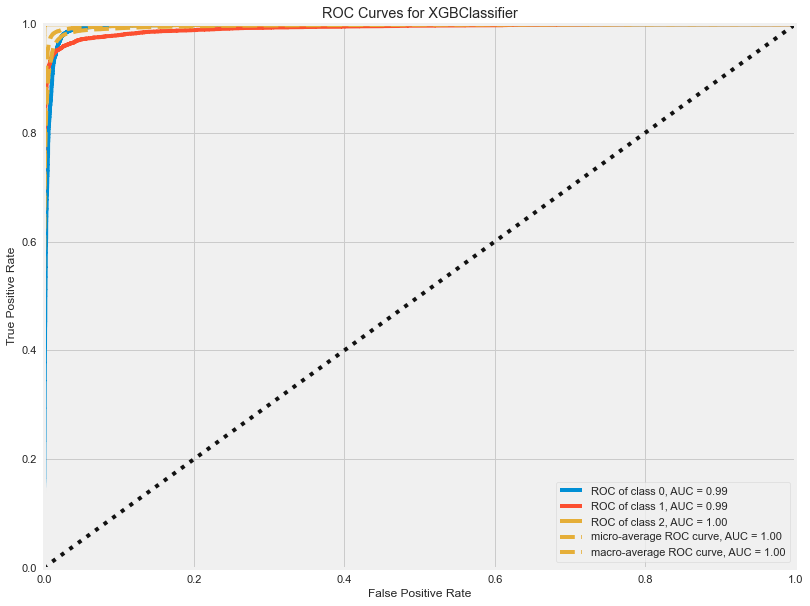

In [42]:
plt.figure(figsize=(12,10))
plot_model(xgboost, plot="auc")

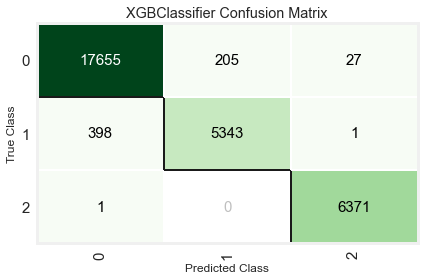

In [12]:
plot_model(xgboost, plot="confusion_matrix")

In [43]:
plot_model(xgboost, plot = 'class_report', save=True)

'Class Report.png'

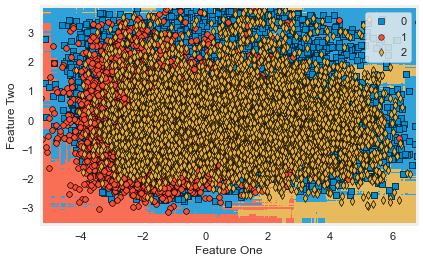

In [16]:
plot_model(xgboost, plot='boundary')

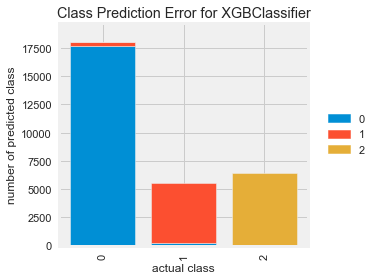

In [17]:
plot_model(xgboost, plot = 'error')

In [49]:
predictions = predict_model(xgboost)
predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9789,0.9954,0.9725,0.9788,0.9788,0.9624,0.9625


,alpha,delta,u,g,r,i,z,run_ID,field_ID,redshift,...,rerun_ID_301,cam_col_1,cam_col_2,cam_col_3,cam_col_4,cam_col_5,cam_col_6,class,Label,Score
0,1.694479,-1.222528,0.032107,0.063127,1.435024,1.513152,0.076387,-0.149646,0.290496,0.922640,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,GALAXY,GALAXY,0.9074
1,0.500334,0.906027,0.033558,0.082872,1.193532,0.921786,0.034297,-0.774903,2.211344,0.149203,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,GALAXY,GALAXY,0.9915
2,-1.676526,-0.583521,0.048476,0.033708,0.574230,0.380173,0.017965,1.673679,1.526286,-0.035010,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,GALAXY,GALAXY,0.9725
3,0.609967,-1.005552,0.099560,0.017586,0.292910,0.417866,0.024618,-1.066655,0.062143,-0.787668,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,STAR,STAR,0.9997
4,-0.452301,1.600917,-0.107092,-0.101022,-1.754207,-1.605108,-0.062892,-1.565638,-0.777388,-0.787199,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,STAR,STAR,0.9998


In [18]:
final_xgboost = finalize_model(xgboost)